<a href="https://colab.research.google.com/github/Damanger/3DGame/blob/main/Omar_Cruz_Perceptr%C3%B3n_10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

In [83]:
#Importación de las librerías
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Cargar el dataset MNIST

In [84]:
#Cargando el dataset MNIST
#El dataset contiene imágenes de dígitos, del 0-9
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Gráfico de cantidad de datos por clase

In [85]:
#Esta función grafica el número de muestras por cada clase
def graficar_clases(y_data, title="Cantidad de datos por clase"):
    totales = np.bincount(y_data, minlength=10)
    plt.bar(np.arange(10), totales)
    plt.grid()
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.title(title)
    plt.show()
    return totales

# Visualizar distribución de clases en el conjunto de entrenamiento

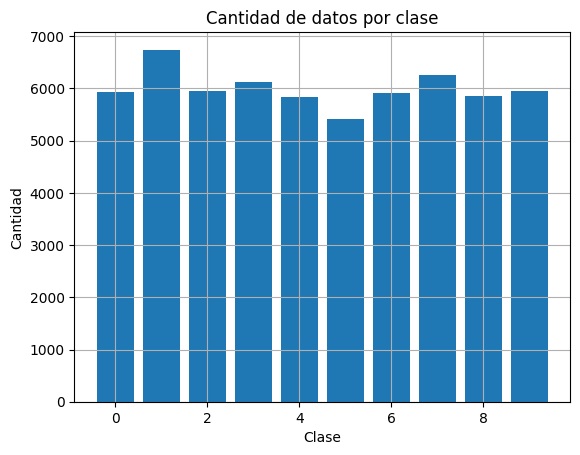

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [86]:
#Visualizar la distribución de las clases
graficar_clases(train_y)

# Aplanar las imágenes y balancear el dataset

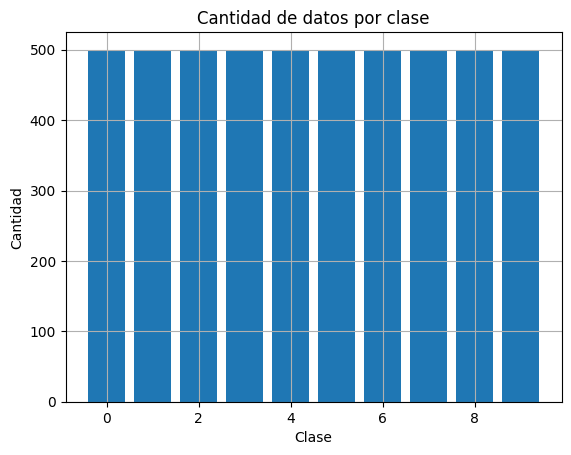

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500])

In [87]:
#Convertimos las imágenes a un vector de 784, es decir, 28*28

X_train = train_x.reshape(-1, 28 * 28)
Y_train = train_y
X, Y = [], []

#La función da un tope de muestras para cada clase, en este caso 500
def balancear_datos(X_temp, Y_temp, samples_per_class=500):
    indices = [np.where(Y_temp == i)[0][:samples_per_class] for i in range(10)]
    X_balanced = np.vstack([X_temp[idx] for idx in indices])
    Y_balanced = np.hstack([Y_temp[idx] for idx in indices])
    return X_balanced, Y_balanced

X, Y = balancear_datos(X_train, Y_train)
graficar_clases(Y)

# Perceptrón binario para clasificación de dígitos

In [88]:
#La función reorna 1 si el valor es >= 0 y -1 en caso contrario
def signo(x):
    return (x >= 0).astype(int) * 2 - 1

# Entrenamiento de perceptrón para cada dígito

In [89]:
#La función representa a cada perceptrón que se entrenará para reconocer un dígito específico
class Perceptron:
    def __init__(self, alpha=0.1, input_size=784):
        self.alpha = alpha
        self.W = np.random.randn(input_size, 1) * alpha

    @staticmethod
    def signo(x):
        return (x >= 0).astype(int) * 2 - 1

    #Función para entrenar al perceptrón
    def entrenar(self, X, Y):
        indices = np.random.permutation(len(X))
        for i in indices:
            X1 = X[i].reshape(1, -1)
            Y_bin = 1 if Y[i] == 1 else -1
            Yobt = self.signo(X1.dot(self.W))
            self.W += self.alpha * (Y_bin - Yobt) * X1.T

    def predecir(self, X):
        return self.signo(X.dot(self.W))

#Entrenamiento de perceptrones para cada dígito
#Se crea la lista de perceptrones donde se entrena a cada uno para clasificar un dígito
perceptrones = [Perceptron(alpha=0.1, input_size=X.shape[1]) for _ in range(10)]

for digit in range(10):
    Y_bin = (Y == digit).astype(int)  #Convertir a 1 para el dígito actual, -1 para los demás
    perceptrones[digit].entrenar(X, Y_bin)
    predicciones = perceptrones[digit].predecir(X)
    precision = (predicciones.flatten() == Y_bin).mean()
    print(f"Precisión en el dígito {digit}: {precision:.4%}")

Precisión en el dígito 0: 9.4000%
Precisión en el dígito 1: 9.1200%
Precisión en el dígito 2: 8.4400%
Precisión en el dígito 3: 8.6200%
Precisión en el dígito 4: 6.7200%
Precisión en el dígito 5: 8.4200%
Precisión en el dígito 6: 9.6800%
Precisión en el dígito 7: 8.1600%
Precisión en el dígito 8: 8.2600%
Precisión en el dígito 9: 7.5600%


# Realizar predicciones en el conjunto de prueba

In [90]:
#Realizando predicciones al conjunto de prueba
test_x_flat = test_x.reshape((-1, multiplicador))
predicciones = np.array([np.argmax([test_x_flat[i].dot(W) for W in pesos_digitos]) for i in range(len(test_x_flat))])

# Evaluación de modelo y gráficos de resultados

Precisión global: 0.82

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       980
           1       0.92      0.96      0.94      1135
           2       0.93      0.85      0.88      1032
           3       0.91      0.74      0.82      1010
           4       0.78      0.93      0.85       982
           5       0.64      0.87      0.74       892
           6       0.83      0.95      0.89       958
           7       0.71      0.92      0.80      1028
           8       0.84      0.67      0.74       974
           9       0.98      0.37      0.54      1009

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.81     10000
weighted avg       0.85      0.82      0.81     10000



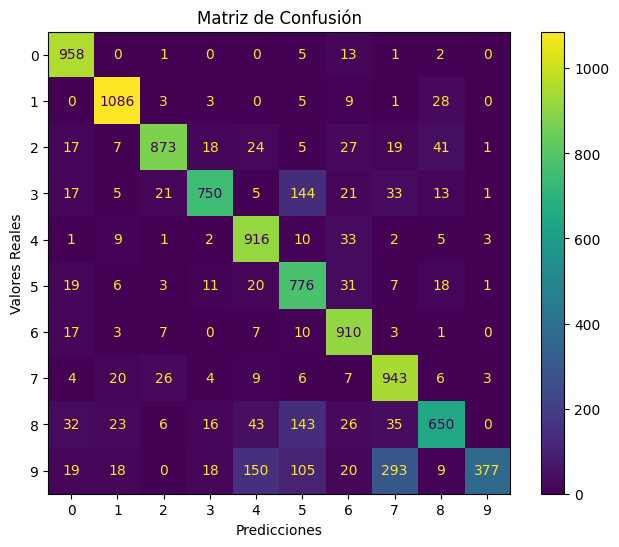

In [91]:
#Función para evaluar el modelo y mostrar los resultados
def evaluar_modelo(y_true, y_pred):
    matriz_confusion = confusion_matrix(y_true, y_pred)
    reporte_clasificacion = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print("Precisión global:", round(accuracy, 2))
    print("\nReporte de Clasificación:\n", reporte_clasificacion)

    #Matriz de confusión
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=np.arange(10)).plot(ax=ax)
    ax.set_title('Matriz de Confusión')
    ax.set_xlabel('Predicciones')
    ax.set_ylabel('Valores Reales')
    plt.show()

evaluar_modelo(test_y, predicciones)


# Graficar ejemplos de predicciones

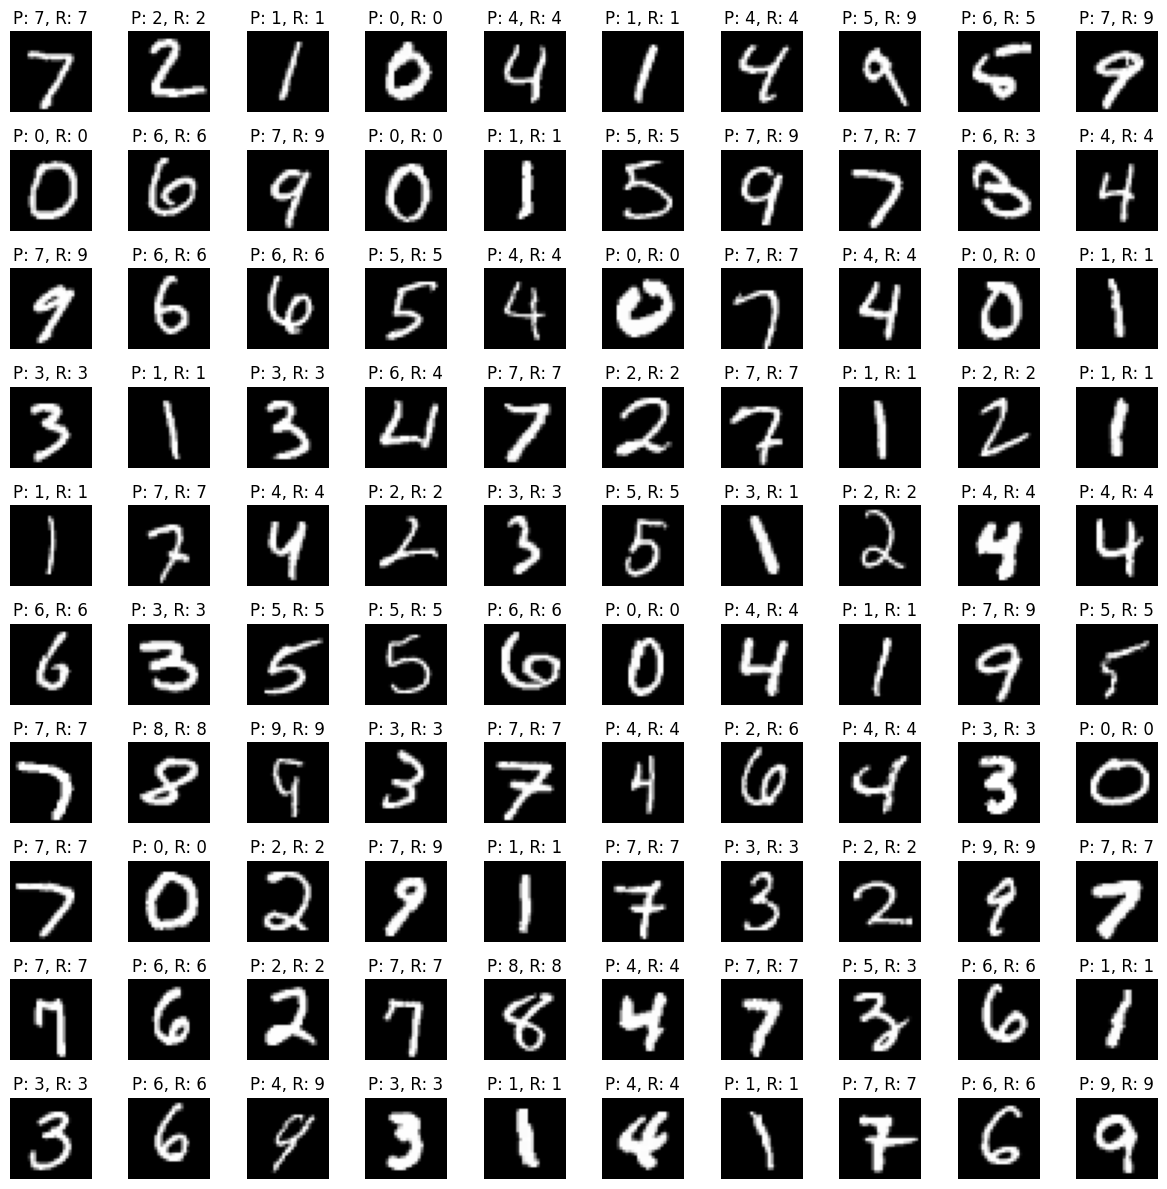

In [92]:
#Muestra las imágenes con las etiquetas de predicción (P) y reales (R)
def graficar_predicciones(imgs, data, labels, preds):
    fig, axs = plt.subplots(imgs, imgs, figsize=(12, 12))
    for i in range(imgs):
        for j in range(imgs):
            idx = i * imgs + j
            if idx >= len(data):
                continue
            axs[i, j].imshow(data[idx].reshape(28, 28), cmap = 'gray')
            axs[i, j].set_title(f"P: {preds[idx]}, R: {labels[idx]}")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

graficar_predicciones(10, test_x, test_y, predicciones)
